In [3]:
import rasterio
from rasterio.merge import merge
from rasterio.transform import from_origin
from rasterio.enums import Resampling
import numpy as np

def create_composite_image(green_band_path, red_band_path, nir_band_path, output_path):
    try:
        # Open the individual band images
        with rasterio.open(green_band_path) as green_band:
            green_data = green_band.read(1)
            green_transform = green_band.transform
            green_profile = green_band.profile

        with rasterio.open(red_band_path) as red_band:
            red_data = red_band.read(1)

        with rasterio.open(nir_band_path) as nir_band:
            nir_data = nir_band.read(1)

        # Create a new composite dataset
        composite_transform = green_transform
        composite_profile = green_profile
        composite_profile.update(count=3, dtype='uint8')

        with rasterio.open(output_path, 'w', **composite_profile) as composite_dataset:
            # Write individual bands to the new dataset
            composite_dataset.write(green_data, 1)
            composite_dataset.write(red_data, 2)
            composite_dataset.write(nir_data, 3)

        print(f"Composite image saved to {output_path}")

    except Exception as e:
        print(f"Error: {e}")

# Example usage
green_band_path = 'D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/GREEN/Landsat_Landsat_1990_01_GREEN.tif.tif'
red_band_path = 'D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/RED/Landsat_Landsat_1990_01_RED.tif.tif'
nir_band_path = 'D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NIR/Landsat_Landsat_1990_01_NIR.tif.tif'
output_path = 'D:/Jintu/Jintu_LULC/TestDL_5/Composit_image/composite_image.tif'

create_composite_image(green_band_path, red_band_path, nir_band_path, output_path)


Composite image saved to D:/Jintu/Jintu_LULC/TestDL_5/Composit_image/composite_image.tif


In [8]:
pip install matplotlib

     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/159.4 kB ? eta -:--:--
     --------- --------------------------- 41.0/159.4 kB 653.6 kB/s eta 0:00:01
     ------------------- ----------------- 81.9/159.4 kB 762.6 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/159.4 kB 819.2 kB/s eta 0:00:01
     ---------------------------------- - 153.6/159.4 kB 762.6 kB/s eta 0:00:01
     ---------------------------------- - 153.6/159.4 kB 762.6 kB/s eta 0:00:01
     ---------------------------------- - 153.6/159.4 kB 762.6 kB/s eta 0:00:01
     ------------------------------------ 159.4/159.4 kB 502.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 660.6 kB/s eta 0:00:12
   ---------------------------------------- 0.1/7.6 MB 812.7 kB/s eta 0:00:10
   ---------------------------------------- 0.1/7.6 MB 744.7 kB/s et

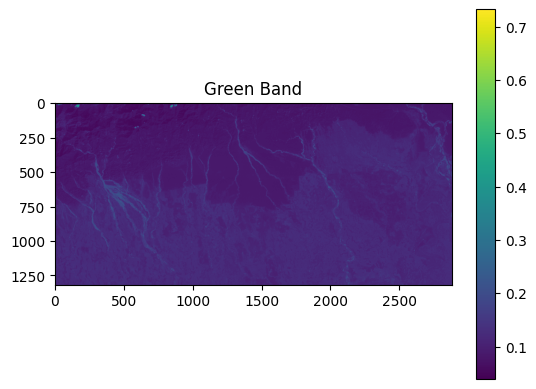

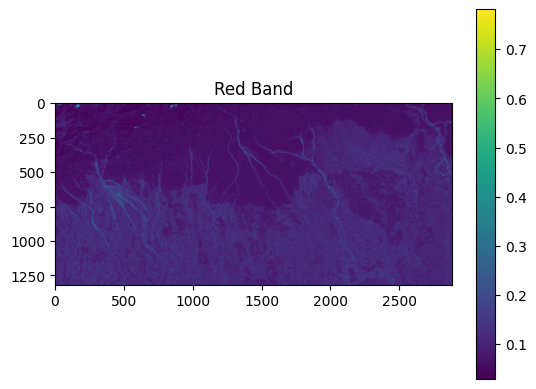

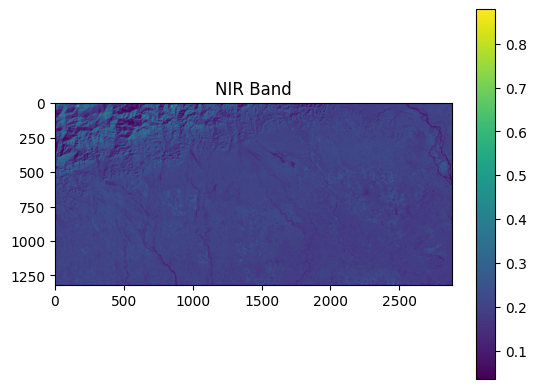

Multiband image saved at D:/Jintu/Jintu_LULC/TestDL_5/Composit_image/composite_image.tif


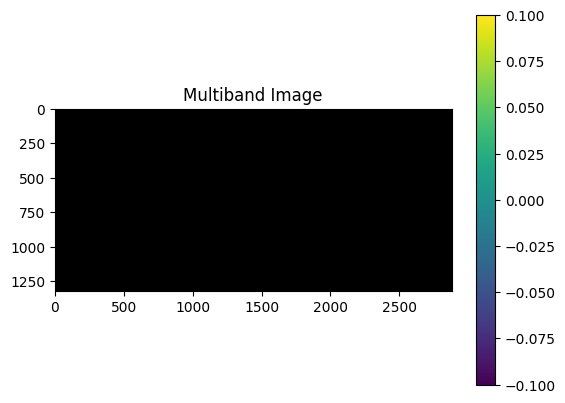

In [12]:
import rasterio
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.transform import from_origin
import rasterio
import numpy as np
import matplotlib.pyplot as plt


# Define the paths to your single-band images
green_band_path = 'D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/GREEN/Landsat_Landsat_1990_01_GREEN.tif.tif'
red_band_path = 'D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/RED/Landsat_Landsat_1990_01_RED.tif.tif'
nir_band_path = 'D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NIR/Landsat_Landsat_1990_01_NIR.tif.tif'

# Read and plot individual bands
def plot_band(band, title):
    plt.imshow(band, cmap='viridis')  # You can use a different colormap if needed
    plt.title(title)
    plt.colorbar()
    plt.show()

# Read the individual bands
with rasterio.open(green_band_path) as green_band_ds:
    green_band = green_band_ds.read(1)
    plot_band(green_band, "Green Band")

with rasterio.open(red_band_path) as red_band_ds:
    red_band = red_band_ds.read(1)
    plot_band(red_band, "Red Band")

with rasterio.open(nir_band_path) as nir_band_ds:
    nir_band = nir_band_ds.read(1)
    plot_band(nir_band, "NIR Band")

# Stack the bands into a 3D array
multiband_data = np.stack([green_band, red_band, nir_band], axis=0)


# Set the output path for the multiband image
multiband_path = 'D:/Jintu/Jintu_LULC/TestDL_5/Composit_image/composite_image.tif'


# Get the profile from one of the bands (assuming they have the same profile)
with rasterio.open(green_band_path) as profile_band_ds:
    profile = profile_band_ds.profile

# Update the profile to reflect the changes for a multiband image
profile.update(
    count=3,  # Number of bands
    dtype=rasterio.uint16,  # Change the dtype if necessary
    compress="lzw"  # Use an appropriate compression method
)

# Write the multiband image
with rasterio.open(multiband_path, 'w', **profile) as dst:
    dst.write(multiband_data)

print(f"Multiband image saved at {multiband_path}")

# Read and plot the multiband image
with rasterio.open(multiband_path) as multiband_ds:
    multiband_image = multiband_ds.read()

plt.imshow(multiband_image.transpose(1, 2, 0), cmap='viridis')  # Adjust the transpose if needed
plt.title("Multiband Image")
plt.colorbar()
plt.show()

In [14]:
from PIL import Image

In [19]:
import os
import rasterio
from rasterio.merge import merge
from rasterio.transform import from_origin
from rasterio.enums import Resampling
import numpy as np

def create_band_composite(input_folders, output_folder, output_name):
    # List to store band data
    band_data = []

    # Iterate through each band folder
    for band_folder in input_folders:
        band_files = [os.path.join(band_folder, file) for file in os.listdir(band_folder) if file.endswith('.tif')]
        
        # Read each band and append to the list
        for band_file in band_files:
            with rasterio.open(band_file) as src:
                band_data.append(src.read(1))

    # Create a composite array by stacking bands
    composite_array = np.stack(band_data, axis=-1)

    # Get metadata from one of the band files
    with rasterio.open(band_files[0]) as src:
        meta = src.meta.copy()

    # Update metadata for the composite
    meta.update(count=composite_array.shape[-1])

    # Output path for the composite
    output_path = os.path.join(output_folder, output_name)

    # Write the composite array to a new raster file
    with rasterio.open(output_path, 'w', **meta) as dst:
        dst.write(composite_array, indexes=list(range(1, composite_array.shape[-1] + 1)))

# Example usage
band_folders = ['D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/GREEN/', 'D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NIR/', 'D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/RED/']
output_folder = 'D:/Jintu/Jintu_LULC/TestDL_5/Composit_image/'
output_name = 'composite.tif'

create_band_composite(band_folders, output_folder, output_name)



ValueError: Source shape (1321, 2881, 102) is inconsistent with given indexes 102